In [ ]:
pip install tensorflow_decision_forests 

In [4]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

2025-09-01 14:10:16.648745: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-01 14:10:16.657958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 14:10:16.688414: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 14:10:16.706235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756735816.723652     303 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756735816.72

In [5]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [133]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [7]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [134]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [9]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_303/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


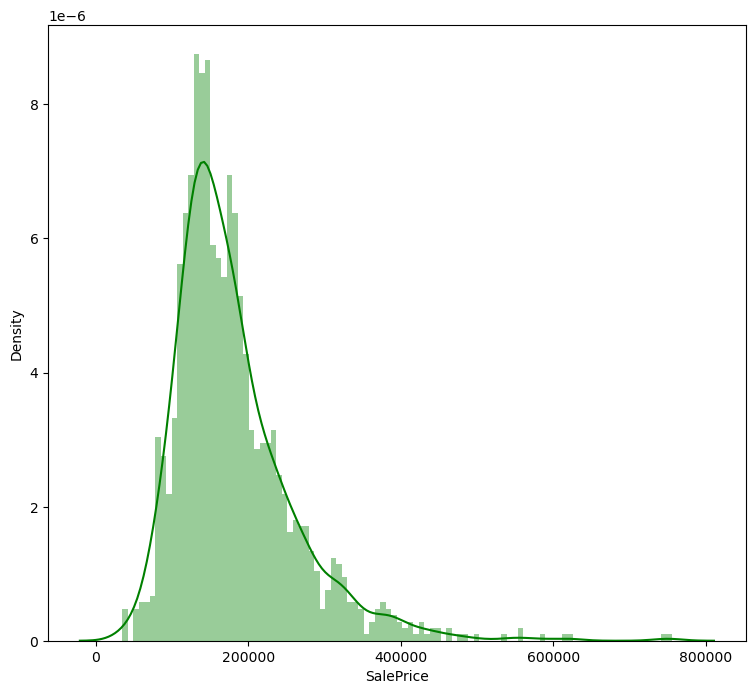

In [10]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [11]:
list(set(dataset_df.dtypes.tolist()))


[dtype('O'), dtype('int64'), dtype('float64')]

In [60]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [116]:
df_num.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<Axes: >

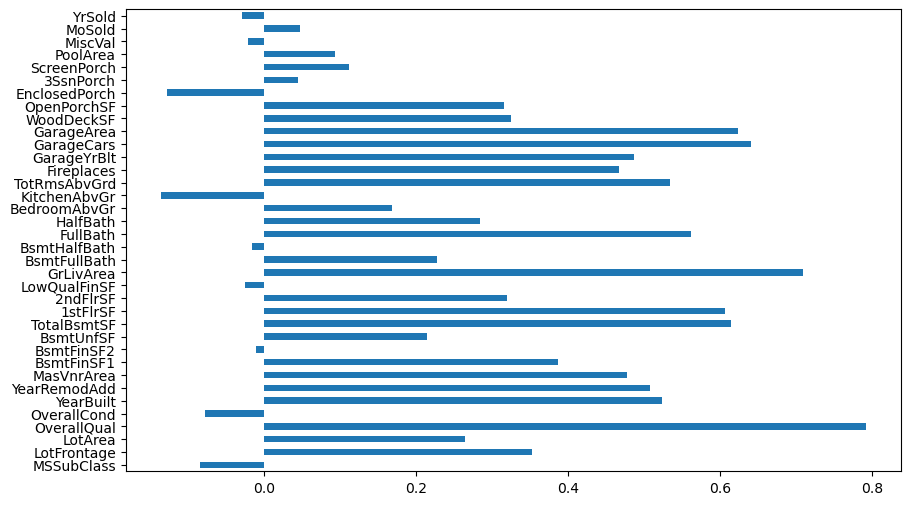

In [28]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

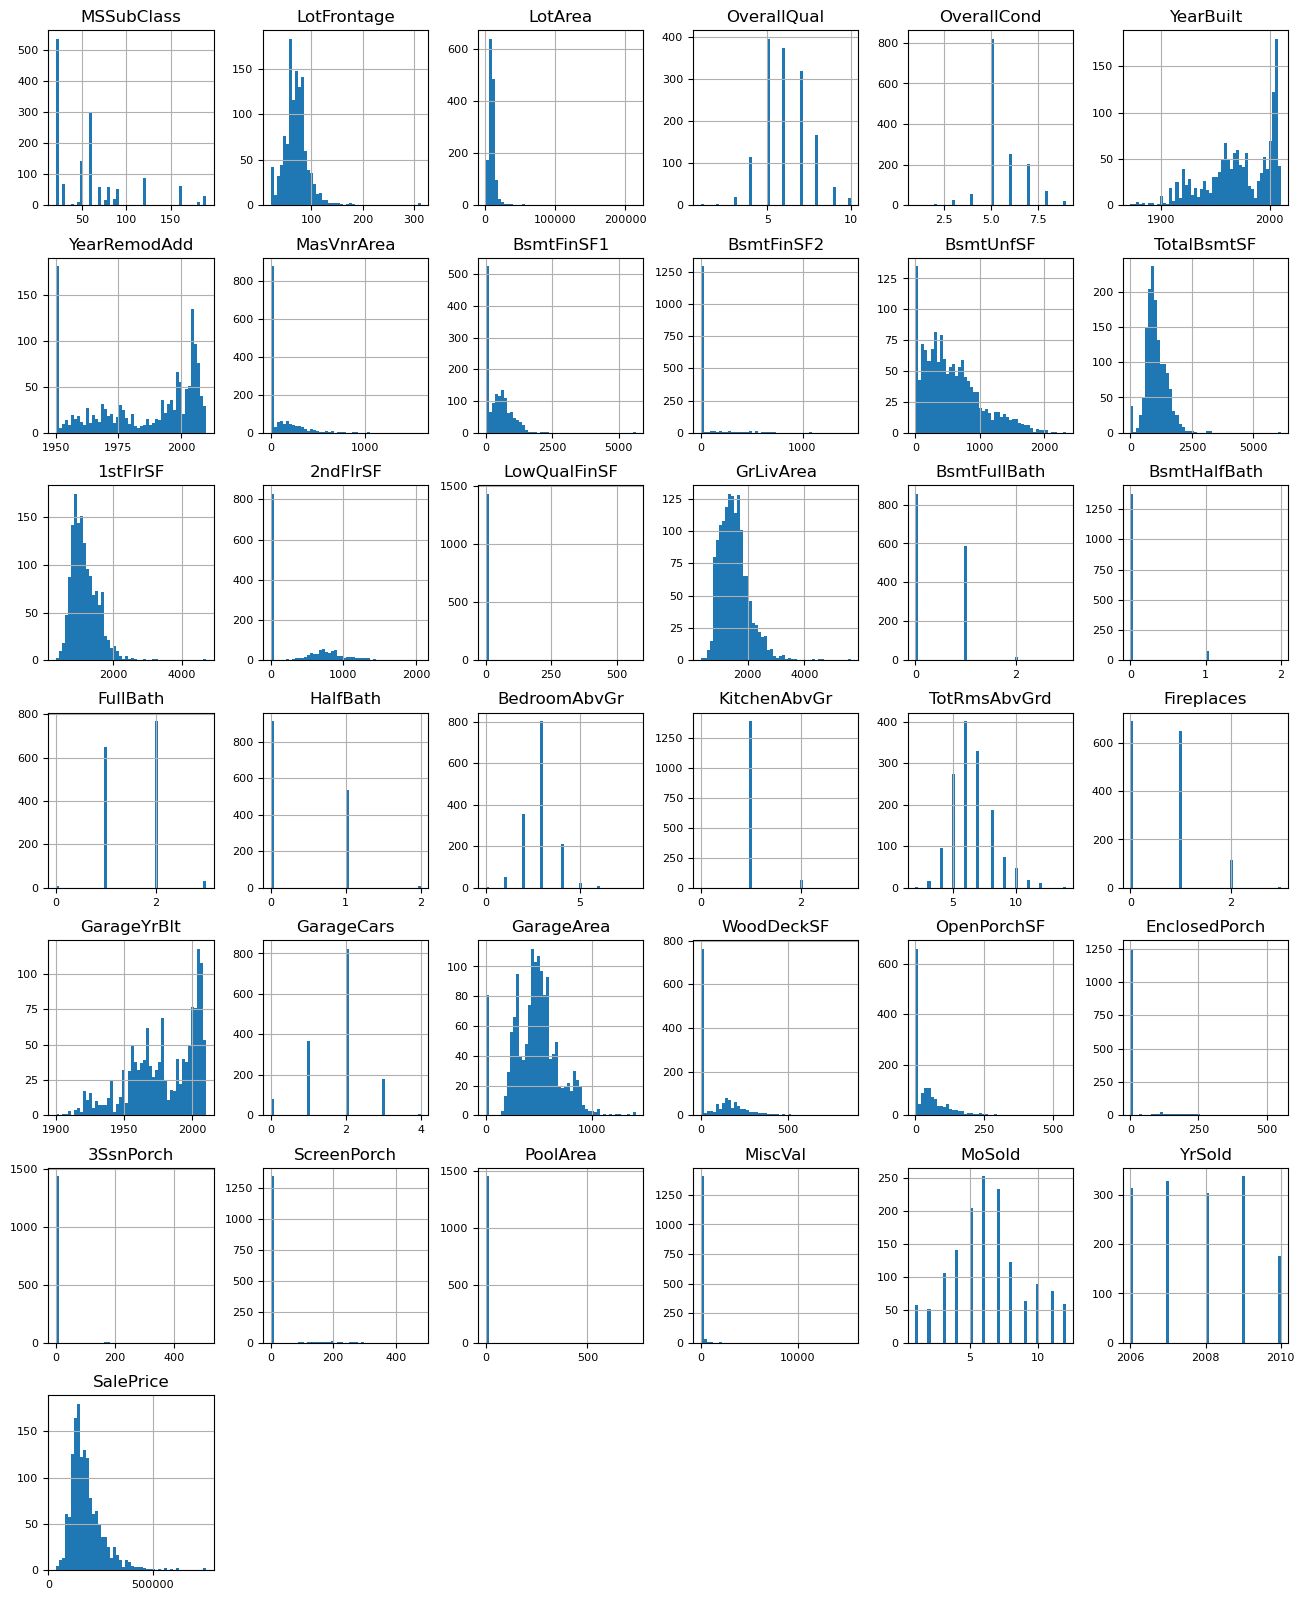

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [31]:
from sklearn.preprocessing import normalize, StandardScaler

In [136]:
dataset_df = dataset_df.dropna(subset=['GarageYrBlt', 'MasVnrArea', 'SalePrice'])
# dataset_df = dataset_df[dataset_df['MasVnrArea'].isna()==0]
# dataset_df = dataset_df[dataset_df['SalePrice'].isna()==0]
dataset_df['LotFrontage'] = dataset_df['LotFrontage'].fillna(dataset_df['LotFrontage'].median())
print("NaN values remaining:", dataset_df.isna().sum().sum())

NaN values remaining: 6636


/tmp/ipykernel_303/3099199340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['LotFrontage'] = dataset_df['LotFrontage'].fillna(dataset_df['LotFrontage'].median())


In [137]:
dataset_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [138]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])


In [72]:
# df_num = df_num[df_num['GarageYrBlt'].isna()==0]
# df_num = df_num[df_num['MasVnrArea'].isna()==0]
# # df_num

In [69]:
# df_num['LotFrontage'] = df_num['LotFrontage'].fillna(df_num['LotFrontage'].median())
# # df_num.isna().sum()

In [74]:
# print("NaN values remaining:", df_num.isna().sum().sum())

NaN values remaining: 0


In [120]:
dataset_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [148]:
# standardize features by removing the mean and scaling to unit variance
X=df_num.drop("SalePrice", axis=1)
# X_std = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index)
X_std = StandardScaler().fit_transform(X)

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
# X = data_matrix

# y: labels vector
y = df_num[['SalePrice']]

# data normalization
X_std = pd.DataFrame(normalize(X_std, norm="l1"), columns=X.columns, index=X.index)
X_std

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.004909,-0.012968,-0.011227,0.031277,-0.027630,0.052753,0.044307,0.024196,0.028192,-0.015071,...,0.013142,-0.039541,0.011062,-0.017829,-0.006162,-0.014340,-0.003637,-0.004401,-0.082548,0.007256
1,-0.040777,0.020004,-0.004934,-0.006247,0.103810,0.005044,-0.021203,-0.027416,0.053007,-0.013631,...,-0.010083,0.073365,-0.033569,-0.016125,-0.005573,-0.012970,-0.003290,-0.003981,-0.022937,-0.028310
2,0.005938,-0.007197,0.003420,0.037829,-0.033418,0.059578,0.050554,0.017829,0.004344,-0.018229,...,0.035926,-0.047825,-0.004771,-0.021564,-0.007453,-0.017344,-0.004399,-0.005323,0.061550,0.008776
3,0.013403,-0.018988,-0.004393,0.024080,-0.021273,-0.077765,-0.029641,-0.023338,-0.020480,-0.011604,...,0.030094,-0.030443,-0.007293,0.163927,-0.004744,-0.011041,-0.002800,-0.003389,-0.063555,-0.053785
4,0.003673,0.023546,0.013418,0.051965,-0.020670,0.035544,0.027515,0.050143,0.016825,-0.011275,...,0.069303,0.028577,0.021865,-0.013338,-0.004610,-0.010728,-0.002721,-0.003293,0.080853,0.005428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.005884,-0.023953,-0.016663,-0.008279,-0.033116,0.054851,0.044081,-0.036332,-0.060831,-0.018064,...,-0.013362,-0.047392,-0.006621,-0.021369,-0.007386,-0.017187,-0.004360,-0.005275,0.038146,-0.037516
1456,-0.039498,0.029622,0.010942,-0.006051,0.017381,0.007947,0.005841,0.002437,0.032927,0.031279,...,-0.000094,0.089154,-0.032516,-0.015619,-0.005399,-0.012563,-0.003187,-0.003856,-0.072318,0.073914
1457,0.010219,-0.006240,-0.004847,0.018361,0.095249,-0.032627,0.030430,-0.017796,-0.011743,-0.008848,...,-0.040250,-0.023213,0.006030,-0.010466,-0.003618,-0.008418,-0.002135,0.147149,-0.014888,0.049530
1458,-0.027265,-0.003599,-0.002944,-0.027268,0.011998,-0.024100,0.016171,-0.018331,-0.027379,0.184724,...,-0.043464,0.065704,-0.022445,0.046676,-0.003726,-0.008672,-0.002200,-0.002662,-0.026864,0.051021


In [149]:
df_std=X_std
# df_std['SalePrice']= y
# df_std = df_std[df_std['SalePrice'].isna()==0]
df_std = pd.concat([df_std, dataset_df.select_dtypes(include = ['O']),y], axis=1)

In [150]:
df_std

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,0.004909,-0.012968,-0.011227,0.031277,-0.027630,0.052753,0.044307,0.024196,0.028192,-0.015071,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,-0.040777,0.020004,-0.004934,-0.006247,0.103810,0.005044,-0.021203,-0.027416,0.053007,-0.013631,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,0.005938,-0.007197,0.003420,0.037829,-0.033418,0.059578,0.050554,0.017829,0.004344,-0.018229,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,0.013403,-0.018988,-0.004393,0.024080,-0.021273,-0.077765,-0.029641,-0.023338,-0.020480,-0.011604,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,0.003673,0.023546,0.013418,0.051965,-0.020670,0.035544,0.027515,0.050143,0.016825,-0.011275,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.005884,-0.023953,-0.016663,-0.008279,-0.033116,0.054851,0.044081,-0.036332,-0.060831,-0.018064,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,-0.039498,0.029622,0.010942,-0.006051,0.017381,0.007947,0.005841,0.002437,0.032927,0.031279,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,0.010219,-0.006240,-0.004847,0.018361,0.095249,-0.032627,0.030430,-0.017796,-0.011743,-0.008848,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,-0.027265,-0.003599,-0.002944,-0.027268,0.011998,-0.024100,0.016171,-0.018331,-0.027379,0.184724,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [151]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df_std)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

943 examples in training, 428 examples in testing.


In [152]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [153]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [167]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp7jcuiaqd as temporary training directory


In [168]:
# rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

In [169]:
rf.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:01.231987. Found 943 examples.
Training model...


I0000 00:00:1756755592.930213     303 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756755592.931585     303 kernel.cc:783] Collect training examples
I0000 00:00:1756755592.931690     303 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756755592.935928     303 kernel.cc:401] Number of batches: 1
I0000 00:00:1756755592.936146     303 kernel.cc:402] Number of examples: 943
I0000 00:00:1756755592.938041     303 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756755592.938148     303 data_spec_inference.cc:354] 1 item(s) have been prune

Model trained in 0:00:03.227847
Compiling model...


2025-09-01 19:39:55.953815: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path /tmp/tmp7jcuiaqd/model/ with prefix 5befc777f799425b
I0000 00:00:1756755596.122365     303 decision_forest.cc:808] Model loaded with 300 root(s), 90094 node(s), and 73 input feature(s).
I0000 00:00:1756755596.122644     303 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-01 19:39:56.122891: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [170]:
from IPython.display import HTML, display
import tensorflow_decision_forests as tfdf

# rf is your trained model
html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=5)
display(HTML(html))

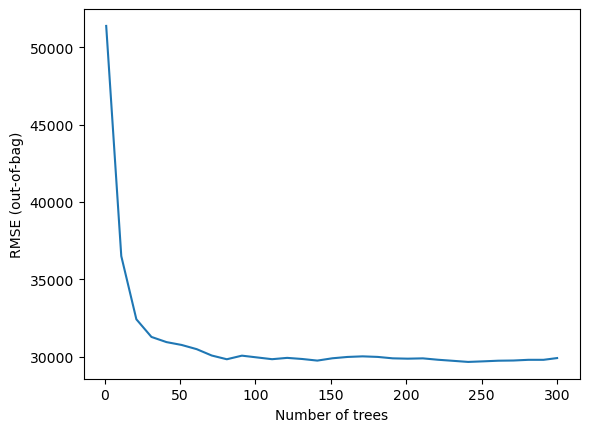

In [171]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [172]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=943, accuracy=None, loss=None, rmse=29912.596244311408, ndcg=None, aucs=None, auuc=None, qini=None)

In [173]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 363ms/step - loss: 0.0000e+00 - mse: 825244480.0000
loss: 0.0000
mse: 825244480.0000


In [25]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [26]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (1; #62), 100.0),
 ("GarageCars" (1; #32), 53.0),
 ("Neighborhood" (4; #59), 45.0),
 ("ExterQual" (4; #22), 33.0),
 ("GrLivArea" (1; #38), 18.0),
 ("GarageArea" (1; #31), 14.0),
 ("YearBuilt" (1; #76), 14.0),
 ("KitchenQual" (4; #44), 12.0),
 ("BsmtQual" (4; #14), 4.0),
 ("TotalBsmtSF" (1; #73), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("BsmtFinSF1" (1; #8), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

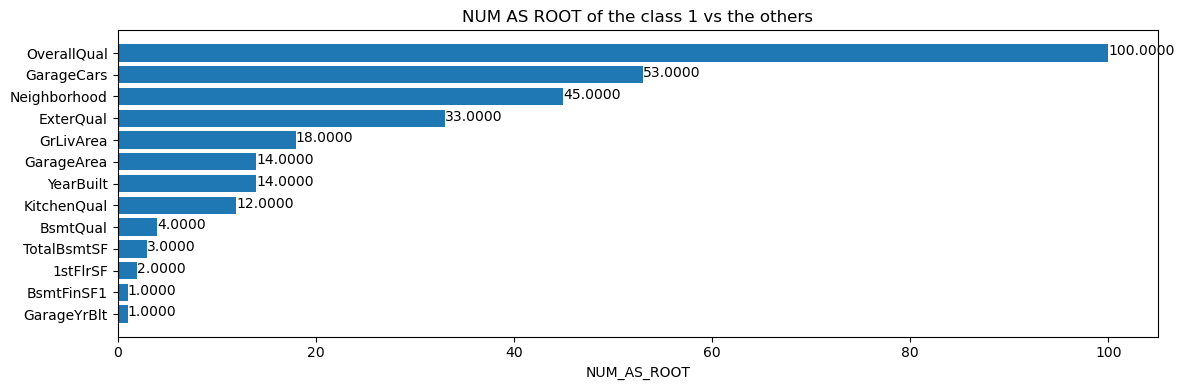

In [27]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [163]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 12ms/step


,Id,SalePrice
0,1461,342669.09375
1,1462,362473.43750
2,1463,374908.96875
3,1464,389002.31250
4,1465,505552.31250


In [165]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('../submissions/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 9ms/step


,Id,SalePrice
0,1461,342669.09375
1,1462,362473.43750
2,1463,374908.96875
3,1464,389002.31250
4,1465,505552.31250
